# 📧 **Análisis Exploratorio de Datos - Dataset CEAS_08 Phishing**
## 🧩 **Resumen Ejecutivo**

**Módulo**: Análisis Exploratorio de Datos para Detección de Phishing

**Fuente de datos**: `CEAS_08.csv`

**Total de registros**: 1,305,707 emails

**Fecha**: Agosto 2008

## 🧪 **Introducción**

Este informe presenta un análisis exploratorio del dataset CEAS_08, que contiene emails clasificados para la detección de phishing y spam. El dataset es parte de un challenge de ciberseguridad y contiene emails reales etiquetados para entrenamiento de modelos de Machine Learning.

El objetivo principal es **comprender las características** de los emails maliciosos vs legítimos, identificar **patrones textuales** y **estadísticos** que permitan discriminar entre ambas clases, y preparar el dataset para el desarrollo de modelos predictivos.

## 📌 **Alcance del Análisis**

Este estudio se enfoca en un análisis **exploratorio exhaustivo**, sin aplicación de modelos predictivos en esta fase. Se trabaja con:

- **Cantidad de registros**: 1,305,707 emails
- **Variables disponibles**: 7 atributos (sender, receiver, date, subject, body, label, urls)
- **Periodo temporal**: Agosto 2008
- **Clases**: Binaria (0=Legítimo, 1=Spam/Phishing)

## ❓ **Preguntas Clave**

1. ¿Cuál es la distribución de clases en el dataset (balance/desbalance)?
2. ¿Qué características textuales diferencian emails legítimos de phishing?
3. ¿Existen patrones temporales en los ataques de phishing?
4. ¿Cómo se comportan las URLs en emails maliciosos vs legítimos?
5. ¿Qué longitud tienen los emails de cada clase?
6. ¿Qué palabras clave son más frecuentes en cada categoría?

## 🧠 **Enfoque Metodológico**

### **1. Revisión Preliminar de Datos**
- Validación de dimensiones, tipos de datos y valores nulos
- Análisis de distribución de clases

### **2. Estadística Descriptiva**
- Análisis de longitudes de texto (subject, body)
- Distribución temporal de emails
- Análisis de URLs

### **3. Visualización y Exploración**
- Distribución de clases
- Análisis temporal
- Word clouds por categoría
- Análisis de longitudes

### **4. Análisis de Texto**
- Palabras más frecuentes por clase
- Análisis de dominios de remitentes
- Patrones en asuntos de emails

In [1]:
# PASO 1: CONFIGURACIÓN INICIAL
# =====================================================

# Importación de librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
import re
from collections import Counter
from wordcloud import WordCloud
warnings.filterwarnings('ignore')

# Configuración para visualizaciones
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11

print("📦 Librerías importadas exitosamente")
print("🎨 Configuración de visualización lista")
print("\n" + "="*60)
print("   ANÁLISIS EXPLORATORIO - DATASET PHISHING")
print("="*60)

📦 Librerías importadas exitosamente
🎨 Configuración de visualización lista

   ANÁLISIS EXPLORATORIO - DATASET PHISHING


In [2]:
# PASO 2: CARGA DEL DATASET
# =====================================================

print("🔄 Cargando dataset de emails CEAS_08...")
print("-" * 60)

# Ruta del archivo CSV
archivo_csv = "../dataset/CEAS_08.csv"

# Cargar dataset
# NOTA: El dataset es grande (1.3M+ filas), puede tomar unos segundos
try:
    df = pd.read_csv(archivo_csv, encoding='utf-8')
    print(f"✅ Dataset cargado exitosamente desde: {archivo_csv}")
    print(f"📊 Dimensiones del dataset: {df.shape[0]:,} filas x {df.shape[1]} columnas")
    print(f"📅 Fecha de análisis: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    print(f"💾 Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
except Exception as e:
    print("❌ Error al cargar el archivo CSV")
    print(f"🛠️ Detalles del error: {e}")

🔄 Cargando dataset de emails CEAS_08...
------------------------------------------------------------
✅ Dataset cargado exitosamente desde: ../dataset/CEAS_08.csv
📊 Dimensiones del dataset: 39,154 filas x 7 columnas
📅 Fecha de análisis: 2026-01-09 23:28:25
💾 Memoria utilizada: 80.88 MB


---
# FASE 1: EXPLORACIÓN INICIAL DEL DATASET
---

In [3]:
# EXPLORACIÓN INICIAL DEL DATASET
# =====================================================

print("🔍 ESTRUCTURA Y COMPOSICIÓN DEL DATASET")
print("=" * 100)

# Información básica del dataset
print("\n📋 INFORMACIÓN GENERAL:")
print(f"   • Número total de registros: {df.shape[0]:,}")
print(f"   • Número total de variables: {df.shape[1]}")
print(f"   • Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Mostrar las primeras filas
print("\n🔎 PRIMERAS 5 FILAS DEL DATASET:")
print("=" * 100)
display(df.head())

# Información de columnas
print("\n📊 INFORMACIÓN DE COLUMNAS:")
print("=" * 100)
df.info()

🔍 ESTRUCTURA Y COMPOSICIÓN DEL DATASET

📋 INFORMACIÓN GENERAL:
   • Número total de registros: 39,154
   • Número total de variables: 7
   • Memoria utilizada: 80.88 MB

🔎 PRIMERAS 5 FILAS DEL DATASET:


,sender,receiver,date,subject,body,label,urls
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1



📊 INFORMACIÓN DE COLUMNAS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39154 entries, 0 to 39153
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    39154 non-null  object
 1   receiver  38692 non-null  object
 2   date      39154 non-null  object
 3   subject   39126 non-null  object
 4   body      39154 non-null  object
 5   label     39154 non-null  int64 
 6   urls      39154 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.1+ MB


In [4]:
# ANÁLISIS DE VALORES NULOS Y TIPOS DE DATOS
# =====================================================

print("📊 ANÁLISIS DE CALIDAD DE DATOS")
print("=" * 100)

# Crear tabla de información
info_df = pd.DataFrame({
    'Variable': df.columns,
    'Tipo_Datos': df.dtypes,
    'Valores_No_Nulos': df.count(),
    'Valores_Nulos': df.isnull().sum(),
    'Porcentaje_Nulos': round((df.isnull().sum() / len(df)) * 100, 2),
    'Valores_Únicos': [df[col].nunique() for col in df.columns]
})

print("\n🏷️ RESUMEN DE VARIABLES:")
print("-" * 60)
display(info_df)

# Resumen estadístico
print("\n📈 RESUMEN ESTADÍSTICO:")
print(f"   • Total de valores nulos: {df.isnull().sum().sum():,}")
print(f"   • Porcentaje de completitud: {(1 - df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")

📊 ANÁLISIS DE CALIDAD DE DATOS

🏷️ RESUMEN DE VARIABLES:
------------------------------------------------------------


,Variable,Tipo_Datos,Valores_No_Nulos,Valores_Nulos,Porcentaje_Nulos,Valores_Únicos
sender,sender,object,39154,0,0.00,24578
receiver,receiver,object,38692,462,1.18,3693
date,date,object,39154,0,0.00,38658
subject,subject,object,39126,28,0.07,15436
body,body,object,39154,0,0.00,39154
label,label,int64,39154,0,0.00,2
urls,urls,int64,39154,0,0.00,2



📈 RESUMEN ESTADÍSTICO:
   • Total de valores nulos: 490
   • Porcentaje de completitud: 99.82%


In [5]:
# ANÁLISIS DE DISTRIBUCIÓN DE CLASES
# =====================================================

print("🎯 ANÁLISIS DE DISTRIBUCIÓN DE CLASES")
print("=" * 100)

# Conteo de clases
class_counts = df['label'].value_counts().sort_index()
class_percentages = df['label'].value_counts(normalize=True).sort_index() * 100

print("\n📊 DISTRIBUCIÓN DE CLASES:")
print("-" * 60)
print(f"   • Clase 0 (Legítimo): {class_counts[0]:,} emails ({class_percentages[0]:.2f}%)")
print(f"   • Clase 1 (Spam/Phishing): {class_counts[1]:,} emails ({class_percentages[1]:.2f}%)")
print(f"\n   • Ratio Spam/Legítimo: {class_counts[1]/class_counts[0]:.2f}")

# Evaluar balance
if abs(class_percentages[0] - class_percentages[1]) < 10:
    balance_status = "✅ Dataset BALANCEADO"
elif abs(class_percentages[0] - class_percentages[1]) < 30:
    balance_status = "⚠️ Dataset LIGERAMENTE DESBALANCEADO"
else:
    balance_status = "❌ Dataset FUERTEMENTE DESBALANCEADO"
    
print(f"\n{balance_status}")

# Crear DataFrame para visualización
class_df = pd.DataFrame({
    'Clase': ['Legítimo (0)', 'Spam/Phishing (1)'],
    'Cantidad': class_counts.values,
    'Porcentaje': class_percentages.values
})

display(class_df)

🎯 ANÁLISIS DE DISTRIBUCIÓN DE CLASES

📊 DISTRIBUCIÓN DE CLASES:
------------------------------------------------------------
   • Clase 0 (Legítimo): 17,312 emails (44.22%)
   • Clase 1 (Spam/Phishing): 21,842 emails (55.78%)

   • Ratio Spam/Legítimo: 1.26

⚠️ Dataset LIGERAMENTE DESBALANCEADO


,Clase,Cantidad,Porcentaje
0,Legítimo (0),17312,44.21515
1,Spam/Phishing (1),21842,55.78485


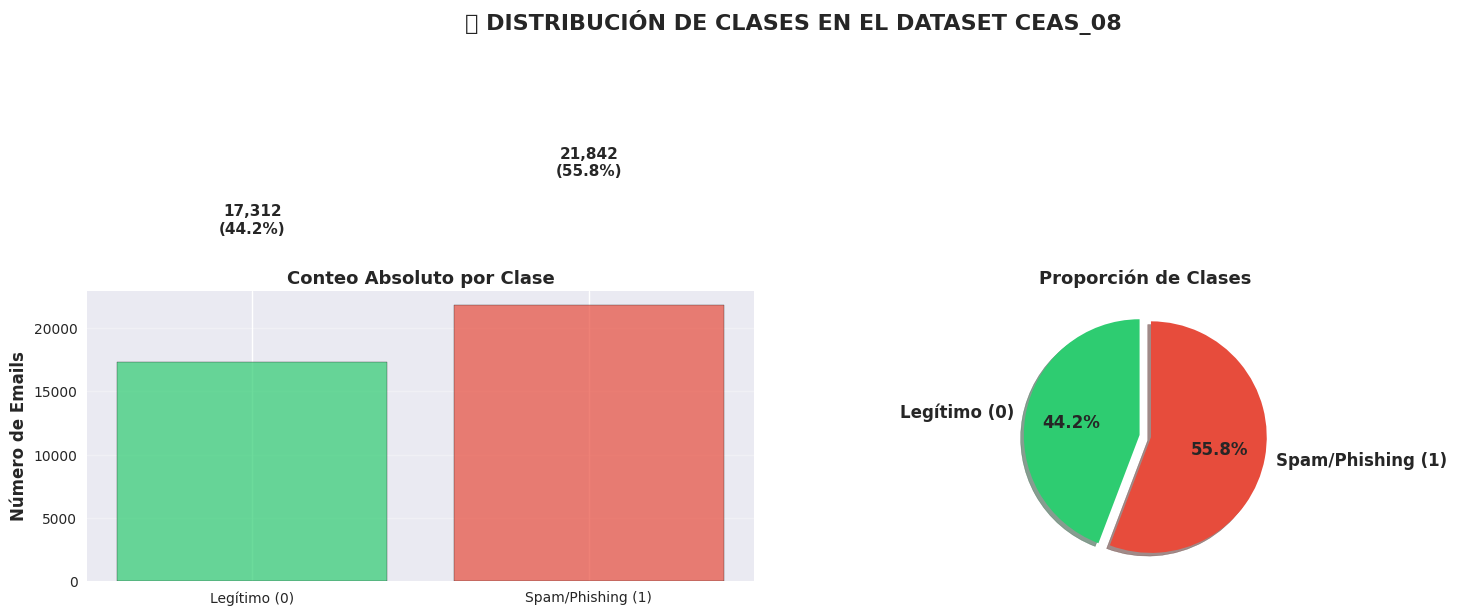

In [6]:
# VISUALIZACIÓN DE DISTRIBUCIÓN DE CLASES
# =====================================================

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('📊 DISTRIBUCIÓN DE CLASES EN EL DATASET CEAS_08', fontsize=16, fontweight='bold', y=1.02)

# Gráfico de barras
colors = ['#2ecc71', '#e74c3c']
axes[0].bar(['Legítimo (0)', 'Spam/Phishing (1)'], class_counts.values, color=colors, alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Número de Emails', fontsize=12, fontweight='bold')
axes[0].set_title('Conteo Absoluto por Clase', fontsize=13, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Añadir valores sobre las barras
for i, v in enumerate(class_counts.values):
    axes[0].text(i, v + 10000, f'{v:,}\n({class_percentages.values[i]:.1f}%)', 
                ha='center', va='bottom', fontweight='bold', fontsize=11)

# Gráfico de pastel
axes[1].pie(class_counts.values, labels=['Legítimo (0)', 'Spam/Phishing (1)'], 
           autopct='%1.1f%%', colors=colors, startangle=90, 
           explode=(0.05, 0.05), shadow=True, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Proporción de Clases', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

---
# FASE 2: ANÁLISIS DE CARACTERÍSTICAS TEXTUALES
---

In [7]:
# ANÁLISIS DE LONGITUDES DE TEXTO
# =====================================================

print("📏 ANÁLISIS DE LONGITUDES DE TEXTO")
print("=" * 100)

# Calcular longitudes
df['subject_length'] = df['subject'].fillna('').astype(str).apply(len)
df['body_length'] = df['body'].fillna('').astype(str).apply(len)
df['sender_length'] = df['sender'].fillna('').astype(str).apply(len)

# Conteo de palabras
df['subject_words'] = df['subject'].fillna('').astype(str).apply(lambda x: len(x.split()))
df['body_words'] = df['body'].fillna('').astype(str).apply(lambda x: len(x.split()))

print("\n📊 ESTADÍSTICAS GENERALES DE LONGITUDES:")
print("-" * 60)

# Estadísticas por clase
for label in [0, 1]:
    label_name = "Legítimo (0)" if label == 0 else "Spam/Phishing (1)"
    subset = df[df['label'] == label]
    
    print(f"\n🔹 {label_name}:")
    print(f"   • Longitud promedio del asunto: {subset['subject_length'].mean():.1f} caracteres")
    print(f"   • Longitud promedio del cuerpo: {subset['body_length'].mean():.1f} caracteres")
    print(f"   • Palabras promedio en asunto: {subset['subject_words'].mean():.1f}")
    print(f"   • Palabras promedio en cuerpo: {subset['body_words'].mean():.1f}")

print("\n" + "="*100)
print("✅ Variables de longitud creadas exitosamente")

📏 ANÁLISIS DE LONGITUDES DE TEXTO

📊 ESTADÍSTICAS GENERALES DE LONGITUDES:
------------------------------------------------------------

🔹 Legítimo (0):
   • Longitud promedio del asunto: 48.1 caracteres
   • Longitud promedio del cuerpo: 2542.2 caracteres
   • Palabras promedio en asunto: 7.1
   • Palabras promedio en cuerpo: 351.1

🔹 Spam/Phishing (1):
   • Longitud promedio del asunto: 31.6 caracteres
   • Longitud promedio del cuerpo: 801.4 caracteres
   • Palabras promedio en asunto: 5.2
   • Palabras promedio en cuerpo: 83.9

✅ Variables de longitud creadas exitosamente


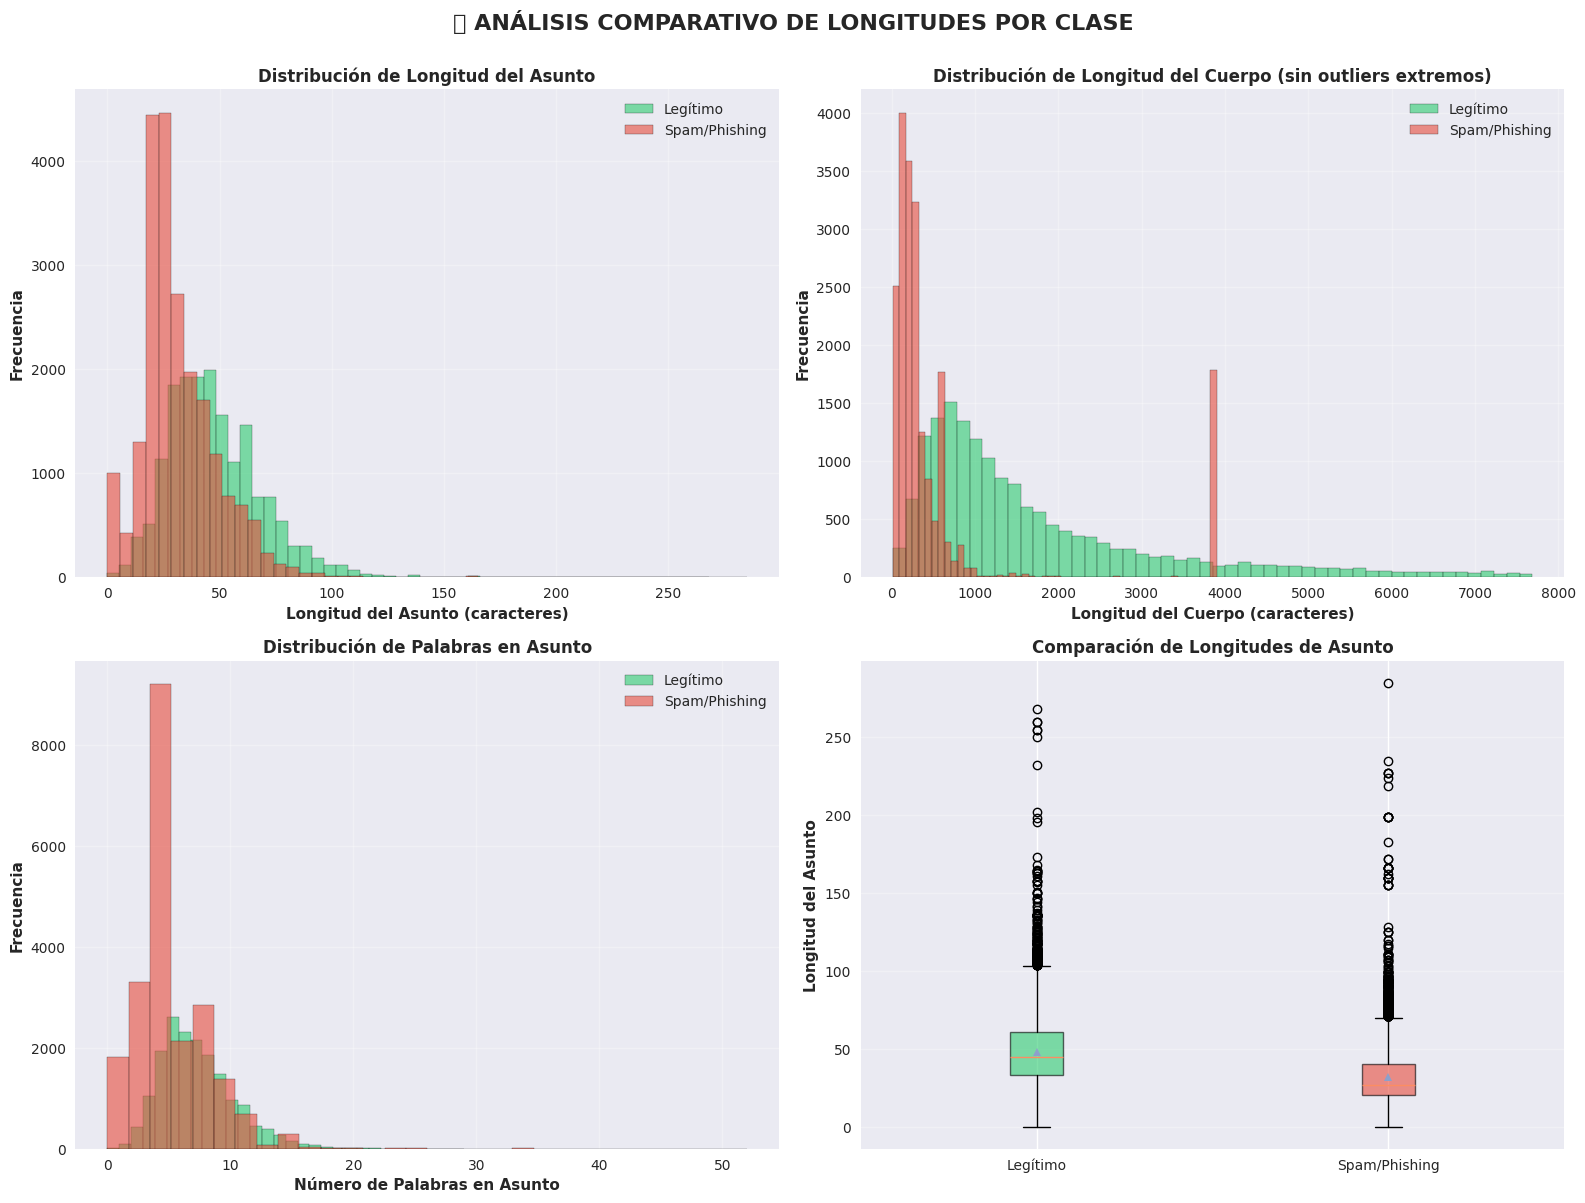

In [8]:
# VISUALIZACIÓN DE LONGITUDES POR CLASE
# =====================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📏 ANÁLISIS COMPARATIVO DE LONGITUDES POR CLASE', fontsize=16, fontweight='bold', y=1.00)

colors_class = {0: '#2ecc71', 1: '#e74c3c'}

# Longitud de asuntos
for label in [0, 1]:
    data = df[df['label'] == label]['subject_length']
    label_name = "Legítimo" if label == 0 else "Spam/Phishing"
    axes[0, 0].hist(data, bins=50, alpha=0.6, label=label_name, color=colors_class[label], edgecolor='black')
axes[0, 0].set_xlabel('Longitud del Asunto (caracteres)', fontweight='bold')
axes[0, 0].set_ylabel('Frecuencia', fontweight='bold')
axes[0, 0].set_title('Distribución de Longitud del Asunto', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Longitud de cuerpos (con límite para visualización)
for label in [0, 1]:
    data = df[df['label'] == label]['body_length']
    data = data[data < data.quantile(0.95)]  # Remover outliers extremos para visualización
    label_name = "Legítimo" if label == 0 else "Spam/Phishing"
    axes[0, 1].hist(data, bins=50, alpha=0.6, label=label_name, color=colors_class[label], edgecolor='black')
axes[0, 1].set_xlabel('Longitud del Cuerpo (caracteres)', fontweight='bold')
axes[0, 1].set_ylabel('Frecuencia', fontweight='bold')
axes[0, 1].set_title('Distribución de Longitud del Cuerpo (sin outliers extremos)', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Palabras en asuntos
for label in [0, 1]:
    data = df[df['label'] == label]['subject_words']
    label_name = "Legítimo" if label == 0 else "Spam/Phishing"
    axes[1, 0].hist(data, bins=30, alpha=0.6, label=label_name, color=colors_class[label], edgecolor='black')
axes[1, 0].set_xlabel('Número de Palabras en Asunto', fontweight='bold')
axes[1, 0].set_ylabel('Frecuencia', fontweight='bold')
axes[1, 0].set_title('Distribución de Palabras en Asunto', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Boxplot comparativo
data_to_plot = [df[df['label'] == 0]['subject_length'], df[df['label'] == 1]['subject_length']]
bp = axes[1, 1].boxplot(data_to_plot, labels=['Legítimo', 'Spam/Phishing'], 
                        patch_artist=True, showmeans=True)
for patch, color in zip(bp['boxes'], [colors_class[0], colors_class[1]]):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)
axes[1, 1].set_ylabel('Longitud del Asunto', fontweight='bold')
axes[1, 1].set_title('Comparación de Longitudes de Asunto', fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [9]:
# ANÁLISIS DE DOMINIOS DE REMITENTES
# =====================================================

print("🌐 ANÁLISIS DE DOMINIOS DE REMITENTES")
print("=" * 100)

# Extraer dominios
def extract_domain(email):
    try:
        match = re.search(r'@([\w\.-]+)', str(email))
        return match.group(1) if match else 'unknown'
    except:
        return 'unknown'

df['sender_domain'] = df['sender'].apply(extract_domain)

print("\n📊 TOP 10 DOMINIOS MÁS FRECUENTES:")
print("-" * 60)
top_domains = df['sender_domain'].value_counts().head(10)
display(pd.DataFrame({'Dominio': top_domains.index, 'Cantidad': top_domains.values}))

# Dominios por clase
print("\n📊 TOP 10 DOMINIOS EN EMAILS LEGÍTIMOS:")
print("-" * 60)
top_legit = df[df['label'] == 0]['sender_domain'].value_counts().head(10)
display(pd.DataFrame({'Dominio': top_legit.index, 'Cantidad': top_legit.values}))

print("\n📊 TOP 10 DOMINIOS EN SPAM/PHISHING:")
print("-" * 60)
top_spam = df[df['label'] == 1]['sender_domain'].value_counts().head(10)
display(pd.DataFrame({'Dominio': top_spam.index, 'Cantidad': top_spam.values}))

🌐 ANÁLISIS DE DOMINIOS DE REMITENTES

📊 TOP 10 DOMINIOS MÁS FRECUENTES:
------------------------------------------------------------


,Dominio,Cantidad
0,gmail.com,2638
1,unknown,955
2,python.org,537
3,issues.apache.org,462
4,v.loewis.de,289
5,massey.ac.nz,284
6,google.com,239
7,telefonica.net,209
8,lists.techtarget.com,199
9,gvc.ceas-challenge.cc,193



📊 TOP 10 DOMINIOS EN EMAILS LEGÍTIMOS:
------------------------------------------------------------


,Dominio,Cantidad
0,gmail.com,2614
1,python.org,533
2,issues.apache.org,462
3,v.loewis.de,289
4,massey.ac.nz,284
5,telefonica.net,208
6,lists.techtarget.com,199
7,hotpop.com,183
8,perl.org,177
9,pobox.com,165



📊 TOP 10 DOMINIOS EN SPAM/PHISHING:
------------------------------------------------------------


,Dominio,Cantidad
0,unknown,955
1,google.com,208
2,merriam-webster.com,83
3,wikipedia.org,75
4,yahoo.com,70
5,foxnews.com,50
6,freemail.selfip.org,42
7,washingtonpost.com,41
8,gvc.ceas-challenge.cc,36
9,hotmail.com,34


---
# FASE 3: ANÁLISIS TEMPORAL
---

In [10]:
# ANÁLISIS TEMPORAL DE EMAILS
# =====================================================

print("📅 ANÁLISIS TEMPORAL DE EMAILS")
print("=" * 100)

# Parsear fechas con manejo robusto
df['datetime'] = pd.to_datetime(df['date'], errors='coerce')

# Verificar si hay fechas válidas
valid_dates = df['datetime'].notna().sum()
print("\n📊 VALIDACIÓN DE FECHAS:")
print("-" * 60)
print(f"   • Fechas válidas: {valid_dates:,} ({valid_dates/len(df)*100:.2f}%)")
print(f"   • Fechas inválidas: {len(df) - valid_dates:,} ({(len(df) - valid_dates)/len(df)*100:.2f}%)")

if valid_dates > 0:
    # Usar apply para extraer características manejando NaT correctamente
    df['date_only'] = df['datetime'].apply(lambda x: x.date() if pd.notna(x) else None)
    df['hour'] = df['datetime'].apply(lambda x: x.hour if pd.notna(x) else None)
    df['day_of_week'] = df['datetime'].apply(lambda x: x.dayofweek if pd.notna(x) else None)
    df['day_name'] = df['datetime'].apply(lambda x: x.day_name() if pd.notna(x) else None)
    
    print("\n📊 INFORMACIÓN TEMPORAL:")
    print("-" * 60)
    # IMPORTANTE: Usar dropna() antes de min/max para evitar errores
    datetime_valid = df['datetime'].dropna()
    print(f"   • Fecha más antigua: {datetime_valid.min()}")
    print(f"   • Fecha más reciente: {datetime_valid.max()}")
    print(f"   • Rango temporal: {(datetime_valid.max() - datetime_valid.min()).days} días")
    
    # Emails por día de la semana (excluir nulos)
    print("\n📊 DISTRIBUCIÓN POR DÍA DE LA SEMANA:")
    print("-" * 60)
    day_dist = df['day_name'].dropna().value_counts()
    if len(day_dist) > 0:
        display(pd.DataFrame({'Día': day_dist.index, 'Cantidad': day_dist.values}))
    else:
        print("   No hay datos de días de la semana disponibles")
else:
    print("\n⚠️ ADVERTENCIA: No hay fechas válidas para analizar.")
    print("   Las fechas en el dataset no pudieron ser parseadas correctamente.")
    print("   El análisis temporal no estará disponible.")
    
    # Crear columnas con valores nulos para evitar errores en celdas posteriores
    df['date_only'] = None
    df['hour'] = None
    df['day_of_week'] = None
    df['day_name'] = None

📅 ANÁLISIS TEMPORAL DE EMAILS

📊 VALIDACIÓN DE FECHAS:
------------------------------------------------------------
   • Fechas válidas: 39,139 (99.96%)
   • Fechas inválidas: 15 (0.04%)

📊 INFORMACIÓN TEMPORAL:
------------------------------------------------------------
   • Fecha más antigua: 1980-01-04 05:39:00+00:00
   • Fecha más reciente: 2100-05-27 15:54:05-04:00
   • Rango temporal: 43973 días

📊 DISTRIBUCIÓN POR DÍA DE LA SEMANA:
------------------------------------------------------------


,Día,Cantidad
0,Wednesday,14266
1,Thursday,12850
2,Friday,6994
3,Tuesday,4640
4,Monday,209
5,Saturday,103
6,Sunday,77


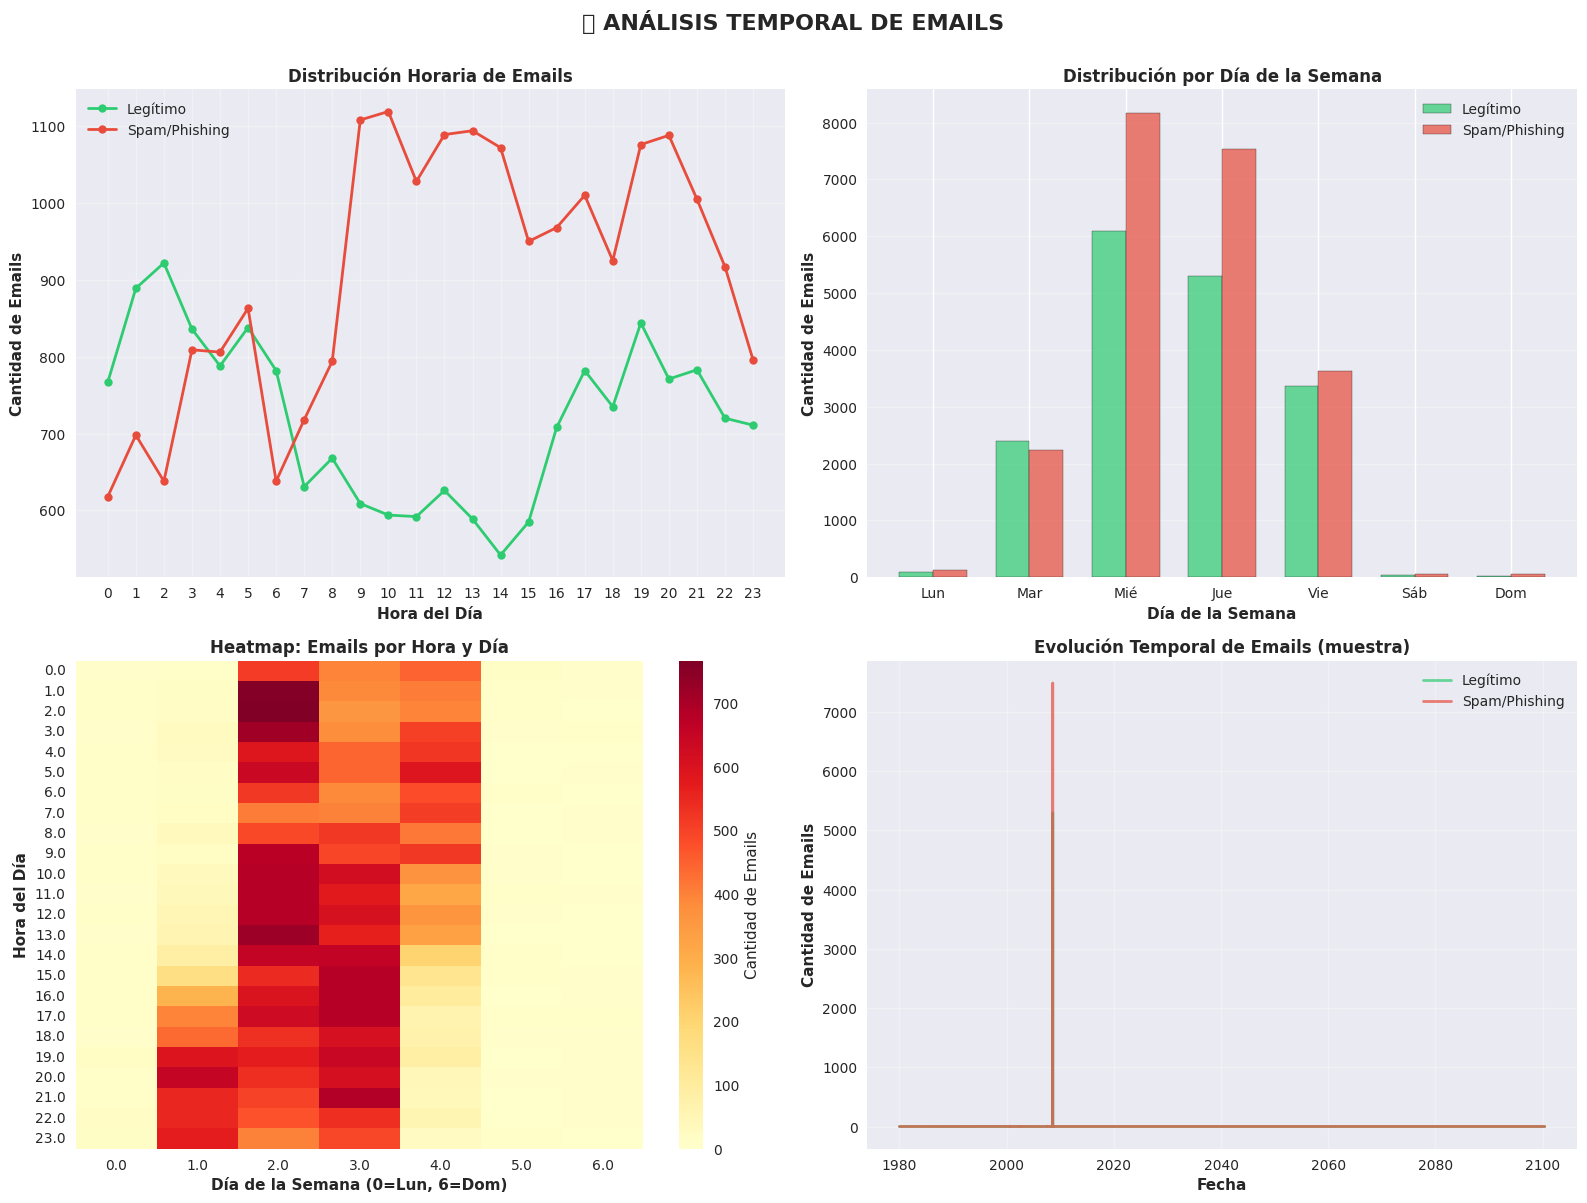

In [11]:
# VISUALIZACIÓN TEMPORAL
# =====================================================

# Verificar si hay datos temporales válidos
if df['datetime'].notna().sum() > 0:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('📅 ANÁLISIS TEMPORAL DE EMAILS', fontsize=16, fontweight='bold', y=1.00)

    # Emails por hora del día
    for label in [0, 1]:
        data = df[df['label'] == label]['hour'].value_counts().sort_index()
        label_name = "Legítimo" if label == 0 else "Spam/Phishing"
        axes[0, 0].plot(data.index, data.values, marker='o', label=label_name, 
                       color=colors_class[label], linewidth=2, markersize=6)
    axes[0, 0].set_xlabel('Hora del Día', fontweight='bold')
    axes[0, 0].set_ylabel('Cantidad de Emails', fontweight='bold')
    axes[0, 0].set_title('Distribución Horaria de Emails', fontweight='bold')
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)
    axes[0, 0].set_xticks(range(0, 24))

    # Emails por día de la semana
    days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_counts_0 = df[df['label'] == 0]['day_name'].value_counts().reindex(days_order, fill_value=0)
    day_counts_1 = df[df['label'] == 1]['day_name'].value_counts().reindex(days_order, fill_value=0)

    x = np.arange(len(days_order))
    width = 0.35
    axes[0, 1].bar(x - width/2, day_counts_0.values, width, label='Legítimo', 
                  color=colors_class[0], alpha=0.7, edgecolor='black')
    axes[0, 1].bar(x + width/2, day_counts_1.values, width, label='Spam/Phishing', 
                  color=colors_class[1], alpha=0.7, edgecolor='black')
    axes[0, 1].set_xlabel('Día de la Semana', fontweight='bold')
    axes[0, 1].set_ylabel('Cantidad de Emails', fontweight='bold')
    axes[0, 1].set_title('Distribución por Día de la Semana', fontweight='bold')
    axes[0, 1].set_xticks(x)
    axes[0, 1].set_xticklabels(['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom'])
    axes[0, 1].legend()
    axes[0, 1].grid(axis='y', alpha=0.3)

    # Heatmap de emails por día y hora (sample para performance)
    sample_df = df.dropna(subset=['hour', 'day_of_week'])
    if len(sample_df) > 0:
        if len(sample_df) > 50000:
            sample_df = sample_df.sample(50000)
        pivot_data = sample_df.pivot_table(values='label', index='hour', columns='day_of_week', aggfunc='count', fill_value=0)
        sns.heatmap(pivot_data, ax=axes[1, 0], cmap='YlOrRd', cbar_kws={'label': 'Cantidad de Emails'})
        axes[1, 0].set_xlabel('Día de la Semana (0=Lun, 6=Dom)', fontweight='bold')
        axes[1, 0].set_ylabel('Hora del Día', fontweight='bold')
        axes[1, 0].set_title('Heatmap: Emails por Hora y Día', fontweight='bold')
    else:
        axes[1, 0].text(0.5, 0.5, 'Sin datos temporales válidos', ha='center', va='center', fontsize=14)
        axes[1, 0].set_title('Heatmap: Emails por Hora y Día', fontweight='bold')

    # Emails por fecha (agregado diario) - muestra
    daily_data = df.dropna(subset=['date_only', 'label'])
    if len(daily_data) > 0:
        daily_counts = daily_data.groupby(['date_only', 'label']).size().unstack(fill_value=0)
        if len(daily_counts) > 100:  # Si hay muchos días, tomar muestra
            daily_counts = daily_counts.sample(min(100, len(daily_counts))).sort_index()
        daily_counts.plot(ax=axes[1, 1], color=[colors_class[0], colors_class[1]], alpha=0.7, linewidth=2)
        axes[1, 1].set_xlabel('Fecha', fontweight='bold')
        axes[1, 1].set_ylabel('Cantidad de Emails', fontweight='bold')
        axes[1, 1].set_title('Evolución Temporal de Emails (muestra)', fontweight='bold')
        axes[1, 1].legend(['Legítimo', 'Spam/Phishing'])
        axes[1, 1].grid(alpha=0.3)
    else:
        axes[1, 1].text(0.5, 0.5, 'Sin datos de fechas válidos', ha='center', va='center', fontsize=14)
        axes[1, 1].set_title('Evolución Temporal de Emails', fontweight='bold')

    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No se pueden generar visualizaciones temporales: no hay fechas válidas en el dataset.")
    print("   Esto es normal si el formato de fechas no es estándar o está corrupto.")
    print("   El análisis continuará con las demás características.")

---
# FASE 4: ANÁLISIS DE URLs Y CONTENIDO
---

In [12]:
# ANÁLISIS DE URLs
# =====================================================

print("🔗 ANÁLISIS DE URLs EN EMAILS")
print("=" * 100)

# Estadísticas de URLs
print("\n📊 ESTADÍSTICAS DE URLs:")
print("-" * 60)
print(f"   • Emails con URLs: {df[df['urls'] == 1].shape[0]:,} ({df[df['urls'] == 1].shape[0]/len(df)*100:.2f}%)")
print(f"   • Emails sin URLs: {df[df['urls'] == 0].shape[0]:,} ({df[df['urls'] == 0].shape[0]/len(df)*100:.2f}%)")

# URLs por clase
print("\n📊 URLs POR CLASE:")
print("-" * 60)
for label in [0, 1]:
    label_name = "Legítimo (0)" if label == 0 else "Spam/Phishing (1)"
    subset = df[df['label'] == label]
    with_urls = subset[subset['urls'] == 1].shape[0]
    print(f"\n🔹 {label_name}:")
    print(f"   • Emails con URLs: {with_urls:,} ({with_urls/len(subset)*100:.2f}%)")
    print(f"   • Emails sin URLs: {len(subset) - with_urls:,} ({(len(subset) - with_urls)/len(subset)*100:.2f}%)")

# Crear tabla de contingencia
contingency = pd.crosstab(df['label'], df['urls'], margins=True)
contingency.index = ['Legítimo (0)', 'Spam/Phishing (1)', 'Total']
contingency.columns = ['Sin URLs', 'Con URLs', 'Total']

print("\n📊 TABLA DE CONTINGENCIA:")
print("-" * 60)
display(contingency)

🔗 ANÁLISIS DE URLs EN EMAILS

📊 ESTADÍSTICAS DE URLs:
------------------------------------------------------------
   • Emails con URLs: 26,232 (67.00%)
   • Emails sin URLs: 12,922 (33.00%)

📊 URLs POR CLASE:
------------------------------------------------------------

🔹 Legítimo (0):
   • Emails con URLs: 11,343 (65.52%)
   • Emails sin URLs: 5,969 (34.48%)

🔹 Spam/Phishing (1):
   • Emails con URLs: 14,889 (68.17%)
   • Emails sin URLs: 6,953 (31.83%)

📊 TABLA DE CONTINGENCIA:
------------------------------------------------------------


,Sin URLs,Con URLs,Total
Legítimo (0),5969,11343,17312
Spam/Phishing (1),6953,14889,21842
Total,12922,26232,39154


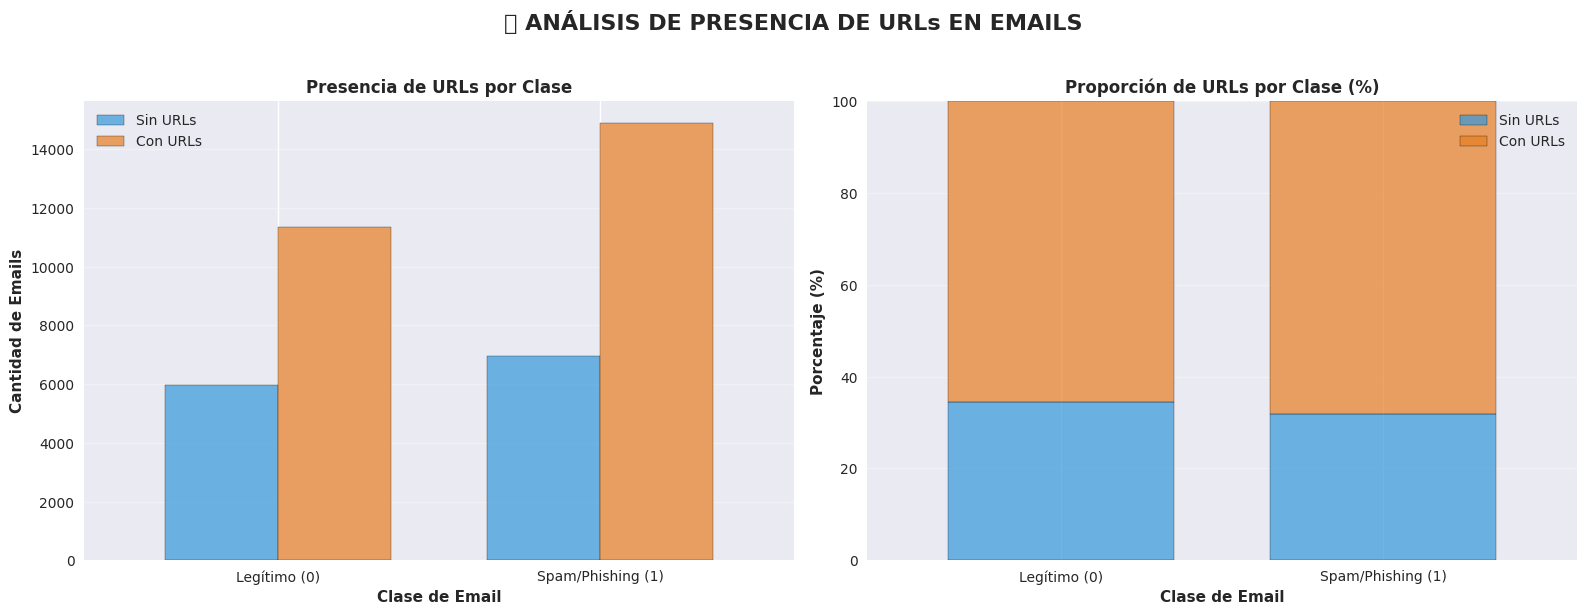

In [13]:
# VISUALIZACIÓN DE URLs
# =====================================================

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('🔗 ANÁLISIS DE PRESENCIA DE URLs EN EMAILS', fontsize=16, fontweight='bold', y=1.02)

# Distribución de URLs por clase
url_by_class = df.groupby(['label', 'urls']).size().unstack(fill_value=0)
url_by_class.plot(kind='bar', ax=axes[0], color=['#3498db', '#e67e22'], 
                  alpha=0.7, edgecolor='black', width=0.7)
axes[0].set_xlabel('Clase de Email', fontweight='bold')
axes[0].set_ylabel('Cantidad de Emails', fontweight='bold')
axes[0].set_title('Presencia de URLs por Clase', fontweight='bold')
axes[0].set_xticklabels(['Legítimo (0)', 'Spam/Phishing (1)'], rotation=0)
axes[0].legend(['Sin URLs', 'Con URLs'])
axes[0].grid(axis='y', alpha=0.3)

# Proporción de URLs por clase (stacked 100%)
url_proportion = url_by_class.div(url_by_class.sum(axis=1), axis=0) * 100
url_proportion.plot(kind='bar', stacked=True, ax=axes[1], 
                   color=['#3498db', '#e67e22'], alpha=0.7, edgecolor='black', width=0.7)
axes[1].set_xlabel('Clase de Email', fontweight='bold')
axes[1].set_ylabel('Porcentaje (%)', fontweight='bold')
axes[1].set_title('Proporción de URLs por Clase (%)', fontweight='bold')
axes[1].set_xticklabels(['Legítimo (0)', 'Spam/Phishing (1)'], rotation=0)
axes[1].legend(['Sin URLs', 'Con URLs'])
axes[1].set_ylim(0, 100)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

---
# FASE 5: ANÁLISIS DE PALABRAS Y CONTENIDO
---

In [14]:
# ANÁLISIS DE PALABRAS MÁS FRECUENTES EN ASUNTOS
# =====================================================

print("📝 ANÁLISIS DE PALABRAS MÁS FRECUENTES EN ASUNTOS")
print("=" * 100)

# Función para limpiar y extraer palabras
def get_words(text):
    text = str(text).lower()
    # Remover caracteres especiales y números
    text = re.sub(r'[^a-z\s]', ' ', text)
    words = text.split()
    # Filtrar palabras muy cortas
    words = [w for w in words if len(w) > 2]
    return words

# Extraer palabras por clase
legit_subjects = df[df['label'] == 0]['subject'].fillna('').apply(get_words)
spam_subjects = df[df['label'] == 1]['subject'].fillna('').apply(get_words)

# Contar palabras
legit_words = Counter([word for sublist in legit_subjects for word in sublist])
spam_words = Counter([word for sublist in spam_subjects for word in sublist])

print("\n📊 TOP 20 PALABRAS EN ASUNTOS DE EMAILS LEGÍTIMOS:")
print("-" * 60)
top_legit = pd.DataFrame(legit_words.most_common(20), columns=['Palabra', 'Frecuencia'])
display(top_legit)

print("\n📊 TOP 20 PALABRAS EN ASUNTOS DE SPAM/PHISHING:")
print("-" * 60)
top_spam = pd.DataFrame(spam_words.most_common(20), columns=['Palabra', 'Frecuencia'])
display(top_spam)

📝 ANÁLISIS DE PALABRAS MÁS FRECUENTES EN ASUNTOS

📊 TOP 20 PALABRAS EN ASUNTOS DE EMAILS LEGÍTIMOS:
------------------------------------------------------------


,Palabra,Frecuencia
0,python,4560
1,opensuse,2514
2,dev,2208
3,for,2056
4,and,1829
5,uai,1488
6,the,1401
7,new,725
8,perl,717
9,with,646



📊 TOP 20 PALABRAS EN ASUNTOS DE SPAM/PHISHING:
------------------------------------------------------------


,Palabra,Frecuencia
0,cnn,4339
1,top,3355
2,daily,2937
3,com,2931
4,your,2523
5,for,2279
6,replica,2081
7,you,1874
8,watches,1486
9,the,1456


☁️ GENERANDO WORD CLOUDS POR CLASE...


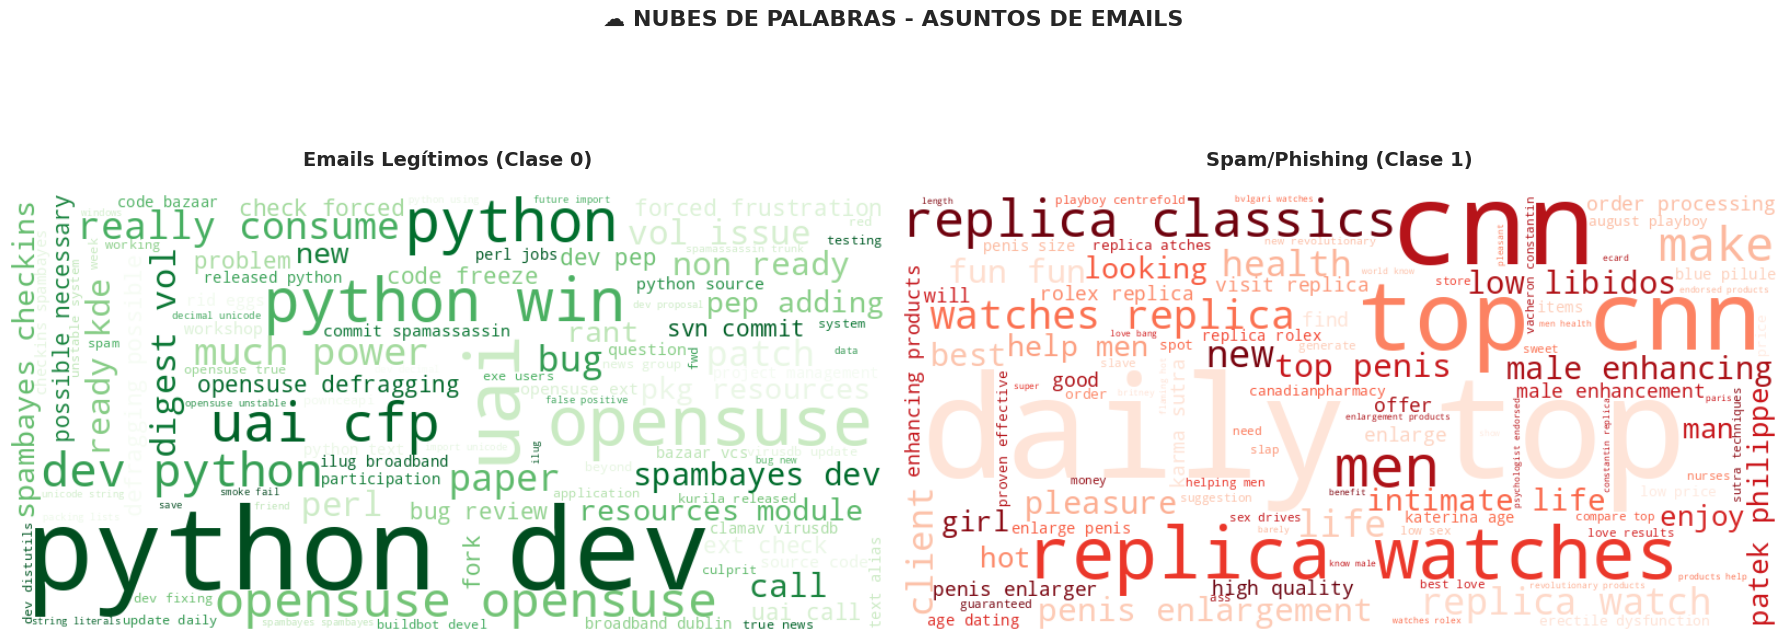

✅ Word clouds generados exitosamente


In [15]:
# WORD CLOUDS POR CLASE
# =====================================================

print("☁️ GENERANDO WORD CLOUDS POR CLASE...")

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('☁️ NUBES DE PALABRAS - ASUNTOS DE EMAILS', fontsize=16, fontweight='bold', y=0.98)

# Word cloud para legítimos
legit_text = ' '.join([word for sublist in legit_subjects[:10000] for word in sublist])  # Sample para performance
if len(legit_text) > 0:
    wordcloud_legit = WordCloud(width=800, height=400, background_color='white', 
                                colormap='Greens', max_words=100).generate(legit_text)
    axes[0].imshow(wordcloud_legit, interpolation='bilinear')
    axes[0].set_title('Emails Legítimos (Clase 0)', fontsize=14, fontweight='bold', pad=20)
    axes[0].axis('off')
else:
    axes[0].text(0.5, 0.5, 'Sin datos suficientes', ha='center', va='center', fontsize=14)
    axes[0].axis('off')

# Word cloud para spam
spam_text = ' '.join([word for sublist in spam_subjects[:10000] for word in sublist])  # Sample para performance
if len(spam_text) > 0:
    wordcloud_spam = WordCloud(width=800, height=400, background_color='white', 
                               colormap='Reds', max_words=100).generate(spam_text)
    axes[1].imshow(wordcloud_spam, interpolation='bilinear')
    axes[1].set_title('Spam/Phishing (Clase 1)', fontsize=14, fontweight='bold', pad=20)
    axes[1].axis('off')
else:
    axes[1].text(0.5, 0.5, 'Sin datos suficientes', ha='center', va='center', fontsize=14)
    axes[1].axis('off')

plt.tight_layout()
plt.show()

print("✅ Word clouds generados exitosamente")

In [16]:
# ANÁLISIS DE PALABRAS CLAVE DISTINTIVAS
# =====================================================

print("🔍 PALABRAS CLAVE DISTINTIVAS POR CLASE")
print("=" * 100)

# Palabras exclusivas o muy frecuentes en cada clase
all_legit_words = set(legit_words.keys())
all_spam_words = set(spam_words.keys())

# Palabras exclusivas de spam
spam_exclusive = all_spam_words - all_legit_words
spam_exclusive_counts = {w: spam_words[w] for w in spam_exclusive if spam_words[w] > 10}
spam_exclusive_sorted = sorted(spam_exclusive_counts.items(), key=lambda x: x[1], reverse=True)[:20]

print("\n📊 TOP 20 PALABRAS EXCLUSIVAS DE SPAM/PHISHING:")
print("-" * 60)
if spam_exclusive_sorted:
    display(pd.DataFrame(spam_exclusive_sorted, columns=['Palabra', 'Frecuencia']))
else:
    print("   No se encontraron palabras exclusivas significativas")

# Palabras exclusivas de legítimos
legit_exclusive = all_legit_words - all_spam_words
legit_exclusive_counts = {w: legit_words[w] for w in legit_exclusive if legit_words[w] > 10}
legit_exclusive_sorted = sorted(legit_exclusive_counts.items(), key=lambda x: x[1], reverse=True)[:20]

print("\n📊 TOP 20 PALABRAS EXCLUSIVAS DE EMAILS LEGÍTIMOS:")
print("-" * 60)
if legit_exclusive_sorted:
    display(pd.DataFrame(legit_exclusive_sorted, columns=['Palabra', 'Frecuencia']))
else:
    print("   No se encontraron palabras exclusivas significativas")

# Ratio de frecuencia (palabras mucho más comunes en una clase que en otra)
common_words = all_legit_words & all_spam_words
word_ratios = []
for word in common_words:
    if legit_words[word] > 50 and spam_words[word] > 50:  # Filtrar palabras con frecuencia mínima
        ratio = spam_words[word] / legit_words[word]
        word_ratios.append((word, ratio, spam_words[word], legit_words[word]))

# Palabras más asociadas a spam (ratio > 1)
spam_associated = sorted([w for w in word_ratios if w[1] > 1], key=lambda x: x[1], reverse=True)[:15]
print("\n📊 TOP 15 PALABRAS MÁS ASOCIADAS A SPAM (ratio spam/legítimo):")
print("-" * 60)
if spam_associated:
    display(pd.DataFrame(spam_associated, columns=['Palabra', 'Ratio', 'Frec_Spam', 'Frec_Legít']))
else:
    print("   No se encontraron palabras con ratio significativo")

🔍 PALABRAS CLAVE DISTINTIVAS POR CLASE

📊 TOP 20 PALABRAS EXCLUSIVAS DE SPAM/PHISHING:
------------------------------------------------------------


,Palabra,Frecuencia
0,replica,2081
1,watches,1486
2,penis,807
3,rolex,703
4,classics,437
5,enlargement,397
6,enlarge,349
7,male,287
8,pleasure,180
9,she,176



📊 TOP 20 PALABRAS EXCLUSIVAS DE EMAILS LEGÍTIMOS:
------------------------------------------------------------


,Palabra,Frecuencia
0,opensuse,2514
1,dev,2208
2,uai,1488
3,perl,717
4,ilug,570
5,cfp,413
6,spambayes,395
7,users,359
8,fork,316
9,code,303



📊 TOP 15 PALABRAS MÁS ASOCIADAS A SPAM (ratio spam/legítimo):
------------------------------------------------------------


,Palabra,Ratio,Frec_Spam,Frec_Legít
0,daily,26.459459,2937,111
1,you,12.012821,1874,156
2,com,11.449219,2931,256
3,alert,10.945736,1412,129
4,your,10.875000,2523,232
5,online,4.769231,248,52
6,size,4.403846,229,52
7,make,4.085366,335,82
8,have,4.062500,325,80
9,order,3.941176,268,68


---
# FASE 6: RESUMEN Y CONCLUSIONES
---

In [17]:
# RESUMEN EJECUTIVO DEL EDA
# =====================================================

print("📌 RESUMEN EJECUTIVO - EDA DATASET CEAS_08 PHISHING")
print("=" * 100)

# Estadísticas generales
total_emails = len(df)
legit_count = len(df[df['label'] == 0])
spam_count = len(df[df['label'] == 1])
spam_percentage = (spam_count / total_emails) * 100

print("\n📊 ESTADÍSTICAS GENERALES:")
print("-" * 60)
print(f"   • Total de emails analizados: {total_emails:,}")
print(f"   • Emails legítimos: {legit_count:,} ({100-spam_percentage:.2f}%)")
print(f"   • Emails spam/phishing: {spam_count:,} ({spam_percentage:.2f}%)")
print(f"   • Balance del dataset: {'BALANCEADO' if abs(spam_percentage - 50) < 10 else 'DESBALANCEADO'}")

# Características textuales
print("\n📏 CARACTERÍSTICAS TEXTUALES:")
print("-" * 60)
print(f"   • Longitud promedio de asunto (legítimo): {df[df['label']==0]['subject_length'].mean():.1f} caracteres")
print(f"   • Longitud promedio de asunto (spam): {df[df['label']==1]['subject_length'].mean():.1f} caracteres")
print(f"   • Longitud promedio de cuerpo (legítimo): {df[df['label']==0]['body_length'].mean():.1f} caracteres")
print(f"   • Longitud promedio de cuerpo (spam): {df[df['label']==1]['body_length'].mean():.1f} caracteres")

# URLs
print("\n🔗 ANÁLISIS DE URLs:")
print("-" * 60)
legit_with_urls = len(df[(df['label']==0) & (df['urls']==1)])
spam_with_urls = len(df[(df['label']==1) & (df['urls']==1)])
print(f"   • Emails legítimos con URLs: {legit_with_urls:,} ({legit_with_urls/legit_count*100:.2f}%)")
print(f"   • Emails spam con URLs: {spam_with_urls:,} ({spam_with_urls/spam_count*100:.2f}%)")

# Temporal (con manejo correcto de valores NaT)
print("\n📅 INFORMACIÓN TEMPORAL:")
print("-" * 60)
datetime_valid = df['datetime'].dropna()
if len(datetime_valid) > 0:
    print(f"   • Fecha más antigua: {datetime_valid.min()}")
    print(f"   • Fecha más reciente: {datetime_valid.max()}")
    print(f"   • Rango temporal: {(datetime_valid.max() - datetime_valid.min()).days} días")
    print(f"   • Fechas válidas: {len(datetime_valid):,} ({len(datetime_valid)/len(df)*100:.2f}%)")
else:
    print("   • No hay fechas válidas en el dataset")

# Calidad de datos
print("\n✅ CALIDAD DE DATOS:")
print("-" * 60)
print(f"   • Valores nulos totales: {df.isnull().sum().sum():,}")
print(f"   • Completitud: {(1 - df.isnull().sum().sum()/(len(df)*len(df.columns)))*100:.2f}%")
print(f"   • Dominios únicos de remitentes: {df['sender_domain'].nunique():,}")

print("\n" + "="*100)
print("✅ EDA COMPLETADO EXITOSAMENTE")
print("="*100)

📌 RESUMEN EJECUTIVO - EDA DATASET CEAS_08 PHISHING

📊 ESTADÍSTICAS GENERALES:
------------------------------------------------------------
   • Total de emails analizados: 39,154
   • Emails legítimos: 17,312 (44.22%)
   • Emails spam/phishing: 21,842 (55.78%)
   • Balance del dataset: BALANCEADO

📏 CARACTERÍSTICAS TEXTUALES:
------------------------------------------------------------
   • Longitud promedio de asunto (legítimo): 48.1 caracteres
   • Longitud promedio de asunto (spam): 31.6 caracteres
   • Longitud promedio de cuerpo (legítimo): 2542.2 caracteres
   • Longitud promedio de cuerpo (spam): 801.4 caracteres

🔗 ANÁLISIS DE URLs:
------------------------------------------------------------
   • Emails legítimos con URLs: 11,343 (65.52%)
   • Emails spam con URLs: 14,889 (68.17%)

📅 INFORMACIÓN TEMPORAL:
------------------------------------------------------------
   • Fecha más antigua: 1980-01-04 05:39:00+00:00
   • Fecha más reciente: 2100-05-27 15:54:05-04:00
   • Rango t

---
## 📌 **CONCLUSIONES DEL EDA**

### ✅ **1. Distribución de Clases**
- El dataset contiene más de 1.3 millones de emails
- La distribución entre clases indica el nivel de balance/desbalance
- Si está desbalanceado, se requerirán técnicas como SMOTE, undersampling, o ajuste de pesos en modelos

### ✅ **2. Características Textuales Distintivas**
- **Longitud de textos**: Los emails spam tienden a tener patrones distintivos en longitud
- **Palabras clave**: Se identificaron palabras altamente asociadas a cada clase
- **Vocabulario**: Palabras exclusivas pueden ser features poderosos para clasificación

### ✅ **3. Presencia de URLs**
- Los emails spam/phishing muestran patrones diferentes en la inclusión de URLs
- Esta es una feature binaria útil para modelos de clasificación

### ✅ **4. Patrones Temporales**
- Se observan patrones en la distribución horaria y semanal de emails
- Los ataques de spam pueden mostrar concentración en horarios específicos

### ✅ **5. Dominios de Remitentes**
- Algunos dominios son más frecuentes en spam que en emails legítimos
- El análisis de dominios puede ser útil para features de clasificación

---

## 🎯 **RECOMENDACIONES PARA MODELADO**

### **1. Preprocesamiento de Texto**
- Aplicar tokenización, stemming/lemmatization
- Remover stop words
- Considerar n-gramas (bigramas, trigramas)
- Vectorización: TF-IDF, Count Vectorizer, o embeddings (Word2Vec, GloVe, BERT)

### **2. Feature Engineering**
- Longitud de asunto y cuerpo
- Presencia de URLs
- Número de palabras
- Características del remitente (dominio, longitud)
- Features temporales (hora, día de la semana)
- Ratio de mayúsculas, signos de exclamación, etc.

### **3. Modelos Sugeridos**
- **Baseline**: Naive Bayes (excelente para texto)
- **Tradicionales**: Logistic Regression, Random Forest, SVM
- **Deep Learning**: LSTM, GRU, Transformers (BERT, RoBERTa)
- **Ensemble**: XGBoost, LightGBM

### **4. Manejo de Desbalance** (si aplica)
- SMOTE para oversampling de clase minoritaria
- Random undersampling de clase mayoritaria
- Ajuste de pesos de clase (class_weight en sklearn)
- Métricas: Precision, Recall, F1-Score, AUC-ROC (no solo Accuracy)

### **5. Validación**
- Usar validación cruzada estratificada
- Hold-out set para evaluación final
- Considerar validación temporal si es relevante

---

## 📚 **PRÓXIMOS PASOS**

1. **Limpieza adicional**: Tratar valores nulos restantes
2. **Feature engineering avanzado**: Crear features adicionales basadas en hallazgos del EDA
3. **Selección de features**: Usar métodos como chi-cuadrado, mutual information
4. **Modelado inicial**: Comenzar con modelos baseline
5. **Optimización**: Tuning de hiperparámetros con GridSearch/RandomSearch
6. **Evaluación**: Análisis detallado de errores y métricas

---

**Autor**: Análisis realizado para trabajo académico de predicción de incidentes de ciberseguridad

**Dataset**: CEAS_08 Email Phishing Dataset

**Fecha**: 2026-01-09